### Let's check if mutation from original to target AA is even possible.


According to theory, after ADAR RNA editing, A becomes I, and I becomes G. Does I always become G tho?
Let's look into papers. 

Papers (esp Gelfand/Moldovan one) state that it is MOSTLY G, rarely T, C, or A. So i guess it makes sense to track the nucleotide FROM the aa change.

Plan:

1. Dictionary of aa conversion
2. New df column: nucleotide after mutation
3. result: how many times we see G, C, T, A

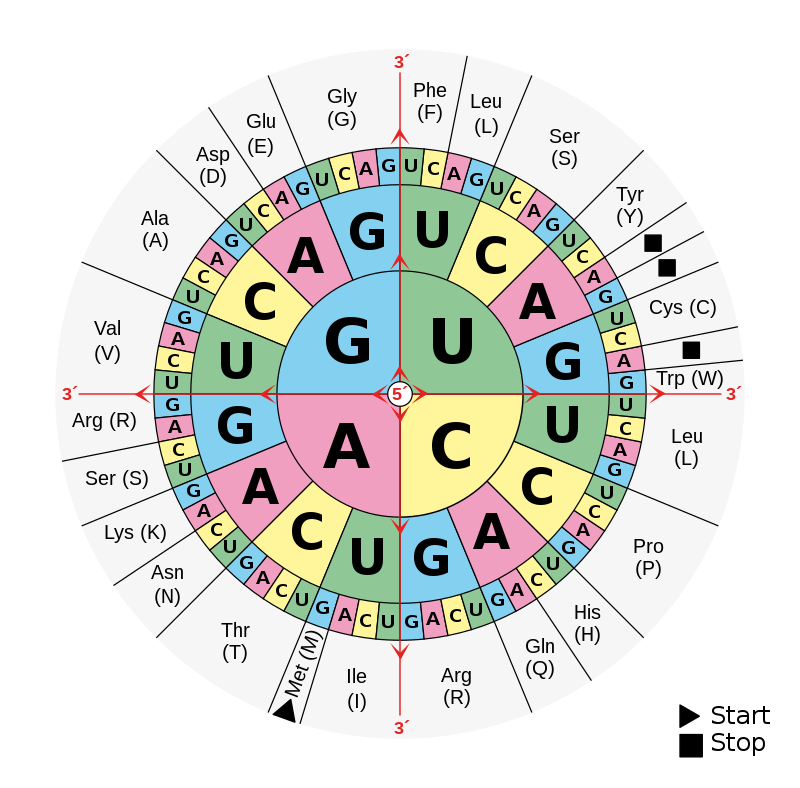

In [3]:
import pandas as pd 
import numpy as np

In [4]:
aa_codons = {
    'A': ['GCT', 'GCC', 'GCA', 'GCG'],
    'C': ['TGT', 'TGC'],
    'D': ['GAT', 'GAC'],
    'E': ['GAA', 'GAG'],
    'F': ['TTT', 'TTC'],
    'G': ['GGT', 'GGC', 'GGA', 'GGG'],
    'H': ['CAT', 'CAC'],
    'I': ['ATT', 'ATC', 'ATA'],
    'K': ['AAA', 'AAG'],
    'L': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'],
    'M': ['ATG'],
    'N': ['AAT', 'AAC'],
    'P': ['CCT', 'CCC', 'CCA', 'CCG'],
    'Q': ['CAA', 'CAG'],
    'R': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
    'S': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],
    'T': ['ACT', 'ACC', 'ACA', 'ACG'],
    'V': ['GTT', 'GTC', 'GTA', 'GTG'],
    'W': ['TGG'],
    'Y': ['TAT', 'TAC'],
    '*': ['TAA', 'TAG', 'TGA']
}

In [5]:
df = pd.read_excel("editing_sites.xlsx", sheet_name="O.vul Editing sites")
df_excel_Ovul = df[['original AA', 'target AA']]

In [6]:
#if there's a lowercase p in original AA column, then make it uppercase

df_excel_Ovul['original AA'] = df_excel_Ovul['original AA'].str.replace('p', 'P')

/var/folders/lf/s1jn10250m5gyqc358vw8z3c0000gn/T/ipykernel_1823/1781321546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excel_Ovul['original AA'] = df_excel_Ovul['original AA'].str.replace('p', 'P')


In [7]:
# if original AA is equal to target AA, then drop the row

df_excel_Ovul = df_excel_Ovul[df_excel_Ovul['original AA'] != df_excel_Ovul['target AA']]

In [8]:
df_excel_Ovul.head()

,original AA,target AA
1,N,S
2,K,R
3,N,D
7,T,A
8,Q,R


In [9]:
def is_AtoG_mutation_possible(original_aa, target_aa, aa_codons):
    # Retrieve the list of codons for the original and target amino acids
    original_codons = aa_codons.get(original_aa, [])
    target_codons = aa_codons.get(target_aa, [])
    
    # Iterate through each codon of the original amino acid
    for original_codon in original_codons:
        # Check if replacing 'A' with 'G' in any position results in a valid target codon
        for i in range(3):
            if original_codon[i] == 'A':
                modified_codon = original_codon[:i] + 'G' + original_codon[i+1:]
                if modified_codon in target_codons:
                    return "yes"
    
    # No valid transition found
    return "no"


In [10]:
is_AtoG_mutation_possible('N', 'S', aa_codons)

'yes'

In [11]:
df_excel_Ovul['AtoG_possible'] = df_excel_Ovul.apply(lambda row: is_AtoG_mutation_possible(row['original AA'], row['target AA'], aa_codons), axis=1)

In [15]:
df_excel_Ovul[df_excel_Ovul['AtoG_possible'] == 'no']

,original AA,target AA,AtoG_possible
1547,P,W,no
9756,P,W,no
29446,P,W,no
30582,P,W,no
32968,P,W,no
43276,P,W,no
55710,P,W,no
55711,P,W,no
61822,P,W,no
63883,P,W,no


In [18]:
#in column "nucleotide after mutation" calculate times when it was only G

df_excel_Ovul['nucleotide after mutation'].value_counts()

[(AAG, CGT), (AAA, CGG), (AAG, AGG), (AAG, CGC), (AAG, CGA), (AAA, AGA), (AAA, CGT), (AAG, CGG), (AAA, AGG), (AAA, CGC), (AAG, AGA), (AAA, CGA)]                                                    15316
[(CTA, CTT), (TTA, TTG), (CTA, CTG), (CTA, CTC), (CTA, TTG), (TTA, CTT), (TTA, CTG), (TTA, CTC)]                                                                                                     9539
[(GAA, GAG)]                                                                                                                                                                                         9429
[(TCA, GGC), (TCA, GGT), (AGT, GGC), (TCA, GGG), (AGT, GGT), (AGT, GGA), (AGT, GGG), (AGC, GGC), (AGC, GGT), (AGC, GGG), (AGC, GGA)]                                                                 8439
[(AAA, AAG)]                                                                                                                                                                                    